In [21]:
class Goal:
    def __init__(self):
        self.tasks = []

class Task:
    def __init__(self, resources_needed):
        self.resources_needed = resources_needed
        pass
    
    def make_trading_rule(self, board):
        return lambda x,y,z: (x,y,z)  # TODO


available_locations_roads = []
print ("hello")
# building = None
# x1,y1 = 0

costs = np.array([[2, 1, 1],
                  [1, 2, 2],
                  [0, 3, 3],
                  [1, 1, 0]])

'''This doesn't really need to be here but too scared to delete'''
def run_markov(board, state):
    h = hitting_time(board, state[0], state[1], state[2])
    min_hitting_time = np.amin(h)
    obj = np.unravel_index(np.argmin(h), h.shape)
    print (obj)
    obj = decode(obj[0])
    print (obj)
    
def hitting_time_until_task(board, task):
    trade_rule = task.make_trading_rule(board)
    resources_per_roll = board.get_resources()
    P = transition_matrix(resources_per_roll, trade_rule)
    w, b, g = task.resources_needed
    return hitting_time(P, w, b, g)

def calculate_hitting_time(board, goal):
    return sum(hitting_time_until_task(task) for task in goal.tasks)

def choose_goal_to_pursue(board, goals):
    options = []
    for goal in goals:
        time_to_goal = calculate_hitting_time(board, goal)
        weight = estimate_weight(board, goal)
        options.append((weight / time_to_goal, goal))
    return max(options)[1]

def action(self):
    self.current_goal = choose_goal_to_pursue(self.board)
    
    
def action(self):
    print (self.recompute)
#     building, available_locations_road, state = run_markov(self, self.board, state, building, self.recompute, available_locations_road)
    if self.recompute:
        print ("action")
        board = self.board
        if self.board.settlements == []:
            print ("empty to something")
            x, y = self.preComp
    #         if if_can_build("settlement" opt_loc):
            self.buy("settlement", x, y)
            available_locations_roads.append((x,y))

        print (self.resources)
        
        min_hitting_time = np.argmin(hitting_time(board, 6-int(self.resources[0]), 6-int(self.resources[1]), 6-int(self.resources[2])))
        print ("min hitting time", min_hitting_time)
        print (decode(min_hitting_time))
        print ("buildings:", buildings)
        if decode(min_hitting_time) in costs:
            building = buildings[costs.ndindex(decode(min_hitting_time))]
        else:
            building = "road"
        print ("building", building)
        
        print (available_locations_roads)
        x1,y1 = np.random.choice(available_locations_roads)

    else:
        if building == "road":
            xs = [x1 + s for s in [-1,1]]
            ys = [y1 + s for s in [-1, 1]]
            road_ends = itertools.product(xs, ys)
            for e in road_ends:
                if e.is_tile:
                    try:
                        self.buy("road", (x1,y1), e)
                        self.recompute = True
                    except CatanException:
                        self.recompute = False
#                         self.action = action_without_compute
                        pass
        elif building == "card":
            try:
                self.buy("card")
                self.recompute = True
            except CatanException:
                self.recompute = False
                pass

        else:
            try:
                self.buy(building, x1, y1)
                self.recompute = True
            except CatanException:
                self.recompute = False
                pass

num_trials = 1

width, height = 4, 4
dice = get_random_dice_arrangement(width, height)
resources = np.random.randint(0, 3, (height, width))
board = Catan(dice, resources)
print(simulate_game(action, planBoard, board, num_trials))       
# run_markov(my_board, (1, 1, 0))


hello


AttributeError: 'Player' object has no attribute 'recompute'

In [68]:
class Goal:
    def __init__(self, tasks=[], x=-1, y=-1):
        self.tasks = list(tasks)
        self.x, self.y = x, y

class CityGoal(Goal):
    def estimate_weight(self, player):
        return 1 # TODO

class SettlementGoal(Goal):
    def estimate_weight(self, player):
        return 1 # TODO

class PortGoal(SettlementGoal):
    def estimate_weight(self, player):
        return 1 # TODO

class CardGoal(Goal):
    def estimate_weight(self, player):
        return 0.0001 # TODO


class Task:
    def __init__(self, x=-1, y=-1):
        self.x, self.y = x, y
    
    def make_trading_rule(self, player):
        return lambda x,y,z: (x,y,z)  # TODO
    
    def execute(self, player):
        pass

class CardTask(Task):
    resources_needed = (1, 2, 2)
    def execute(self, player):
        if player.if_can_buy("card"):
            player.buy("card")
            return True
        return False

class CityTask(Task):
    resources_needed = (0, 3, 3)
    def execute(self, player):
        if player.if_can_buy("city"):
            player.buy("city", self.x, self.y)
            return True
        return False

class SettlementTask(Task):
    resources_needed = (2, 1, 1)
    def execute(self, player):
        if player.if_can_buy("settlement"):
            player.buy("settlement", self.x, self.y)
            player.available_locations.add((self.x, self.y))
            return True
        return False

class RoadTask(Task):
    resources_needed = (1, 1, 0)
    def execute(self, player):
        if player.if_can_buy("road"):
            player.buy("road", self.x, self.y)
            player.available_locations.add(self.x)
            player.available_locations.add(self.y)
            return True
        return False


In [95]:
def hitting_time_until_task(player, task):
    w, b, g = task.resources_needed
    w_curr, b_curr, g_curr = player.resources
    if w_curr >= w and b_curr >= b and g_curr >=g:
        return 0
    trade_rule = task.make_trading_rule(player)
    resources_per_roll = player.board.get_resources()
    P = transition_matrix(resources_per_roll, trade_rule)
    indexes, beta = hitting_time(P, w, b, g)
    encoded = int(encode(w_curr, b_curr, g_curr))
    i = indexes.index(encoded)
    return beta[i]

def calculate_hitting_time(player, goal):
    return sum(hitting_time_until_task(player, task) for task in goal.tasks)

def choose_goal_to_pursue(player, goals):
    options = []
    for goal in goals:
        time_to_goal = calculate_hitting_time(player, goal)
        weight = goal.estimate_weight(player)
        options.append((weight / (time_to_goal+0.1), goal))
    return max(options)[1]

def distance(loc1, loc2):
    return abs(loc1[0] - loc2[0]) + abs(loc1[1] - loc2[1])

def get_shortest_path_to_location(available_locations, x, y):
    """ Returns a list of ((x1, y1), (x2, y2)) tuples, each symbolizing a road to be built"""
    # this is the closest point to the destination (x, y)
    start = min(available_locations, key=lambda loc: distance(loc, (x, y)))
    # right now we assume that the best path to take is by going diagonally across the board
    #     that way we maximize new available locations that have 4 neighboring resources
    #     maybe ideally it would take into account where the other roads are and build in an opposite direction to them or smth
    amount_to_go = [x - start[0], y - start[1]] # (amount_to_go_right, amount_to_go_up)
    points_to_hit = [start]
    curr = list(start) # so that it is mutable, will need to cast to tuple before recording
    end  = [x, y]
    while curr != end:
        # if i == 0, we are moving left/right, if i == 1, we are moving down/up
        # this will move horizontally, then diagonally
        i = 0 if abs(amount_to_go[0]) >= abs(amount_to_go[1]) else 1
        amount = amount_to_go[i] // abs(amount_to_go[i])
        curr[i] += amount
        amount_to_go[i] -= amount
        points_to_hit.append(tuple(curr))
    # Now points_to_hit is populated with (x,y) tuples of all the locations we're going to hit
    return list(zip(points_to_hit, points_to_hit[1:]))


def generate_road_tasks_to_point(player, x, y):
    """If all building/road buys were made through the Task API, then 
            available_locations is a set of (x,y) tuples with points we can build roads from"""
    cheapest_roads_to_get_there = get_shortest_path_to_location(player.available_locations, x, y)
    tasks = []
    for road in cheapest_roads_to_get_there:
        tasks.append(RoadTask(road[0], road[1]))
    return tasks

        
def generate_goal_settlement_at_location(player, x, y):
    tasks = generate_road_tasks_to_point(player, x, y)
    tasks.append(SettlementTask(x, y))
    return SettlementGoal(tasks, x, y)

def generate_all_settlement_goals(player):
    goals = []
    return goals

def generate_all_city_goals(player):
    goals = []
    return goals

def generate_all_port_goals(player):
    goals = []
    return goals

def generate_all_possible_goals(player):
    # Add all the possible settlment only goals (no building of roads)
    settlements = generate_all_settlement_goals(player)
    # Add all the possible city goals
    cities = generate_all_city_goals(player)
    # Add all the possible port goals
    ports = generate_all_port_goals(player)
    # Add all the card goal
    cards = [
        CardGoal([CardTask()])
    ]
    return settlements + cities + ports + cards

def action(self):
    if self.board.settlements == []:
        # What are we to do on our first turn?
        x, y = self.preComp
        settlementTask = SettlementTask(x, y)
        settlementTask.execute()
    print(self.resources)
    possible_goals = generate_all_possible_goals(self)
    self.current_goal = choose_goal_to_pursue(self, possible_goals)
    tasks = self.current_goal.tasks
    if len(tasks) == 0:
        print("Should not occur: no tasks in goal")

    while len(tasks) > 0:
        curr_task = tasks[0]
        if curr_task.execute(self):
            tasks.pop(0)
        else:
            break # Could not complete our task for some reason


def planBoard(baseBoard):
    return 2, 3
    resources_per_tile = {}
    for v in range(baseBoard.max_vertex):
        loc = baseBoard.get_vertex_location(v)
        resources_per_tile[loc] = (set(), 0)
        for i in [-1, 0]: 
            for j in [-1,0]:
                neighbor = (loc[0]+i, loc[1] + j)
                if neighbor.is_tile():
                    resources_per_tile[loc][0].add(baseBoard.resources[neighbor])
                    resources_per_tile[loc][1] += 1
    optimal_loc = max(resources_per_tile.keys(), key = lambda x: len(resources_per_tile[x][0]) + resources_per_tile[x][1])
    return opt_loc

Drawing...


TypeError: execute() missing 1 required positional argument: 'player'

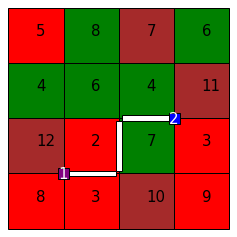

In [89]:
from hittingtime import *
import numpy as np
from catan import Catan, CatanException, get_random_dice_arrangement, Player, simulate_game, simulate_game_and_save
import matplotlib.pyplot as plt
from itertools import repeat
%matplotlib inline

available_locations_roads = []
# building = None
# x1,y1 = 0

costs = np.array([[2, 1, 1],
                  [1, 2, 2],
                  [0, 3, 3],
                  [1, 1, 0]])

num_trials = 1

width, height = 4,4
dice = get_random_dice_arrangement(width, height)
resources = np.random.randint(0, 3, (height, width))
board = Catan(dice, resources, [6], [13], [(6, 7), (7, 12), (12, 13)])
board.draw()
print(simulate_game(action, planBoard, board, num_trials))

In [27]:
input()

hello


'hello'

In [97]:
get_shortest_path_to_location([(0,0), (0,2)], 4,4)

[((0, 2), (1, 2)),
 ((1, 2), (2, 2)),
 ((2, 2), (3, 2)),
 ((3, 2), (3, 3)),
 ((3, 3), (4, 3)),
 ((4, 3), (4, 4))]